
# STRUCTURAL BRAIN NETWORK - A NETWORK ANALYSIS POINT OF VIEW

## Structural network of cortical areas - 68 Regions of Interest (ROI)


Data comes from:
http://umcd.humanconnectomeproject.org/ 


- Study Name: ICBM

- Imaging Modality: DTI

- Scan Parameters: Diffusion directions=30, B value=800

- Healty individuals 

- Age Range 18-90

- Gender: Mixed

- Subject Pool: ICBM normal subjects

- Group Size: 138



### References:

"Networks of the brain", Olaf Sporns

"Rich-Club Organization of the Human Connectome", Martijn P. van den Heuvel and Olaf Sporns, Journal of Neuroscience 2 November 2011, 31 (44) 15775-15786; DOI: https://doi.org/10.1523/JNEUROSCI.3539-11.2011


In [1]:
#importing the necessary libraries
import pandas as pd
import networkx as nx
from math import *
import numpy as np
import sys
import collections as col
import scipy.io as sio
import seaborn as sns
import networkx.algorithms.centrality as nc
from operator import itemgetter
import statistics as st

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\arian\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'gcd', 'sin', 'hypot', 'nan', 'log', 'ldexp', 'ceil', 'frexp', 'expm1', 'cos', 'degrees', 'tan', 'isfinite', 'pi', 'isclose', 'remainder', 'sinh', 'sqrt', 'tanh', 'log2', 'floor', 'log10', 'trunc', 'isnan', 'modf', 'radians', 'log1p', 'copysign', 'isinf', 'fabs', 'fmod', 'e', 'inf', 'cosh', 'exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#read files
open('freesurfer_regions_68_sort_full.txt')
open('fs_region_centers_68_sort.txt')
open('icbm_fiber_mat.txt')

<_io.TextIOWrapper name='icbm_fiber_mat.txt' mode='r' encoding='cp1252'>

In [4]:
#ROIs names
N = []
name_file = open('freesurfer_regions_68_sort_full.txt', 'r')
for line in name_file.readlines():
    N.append([line])
    for i in line.split(","):
        N[-1].append(i)
N=array(N)
N=N[:,0]
for i in range(len(N)):
    N[i]=N[i].rstrip() 
name_df=pd.DataFrame({'node name' : N})
name_df

,node name
0,lh_bankssts
1,lh_caudalanteriorcingulate
2,lh_caudalmiddlefrontal
3,lh_cuneus
4,lh_entorhinal
...,...
63,rh_supramarginal
64,rh_frontalpole
65,rh_temporalpole
66,rh_transversetemporal


In [5]:
#P=nodes positions (3D coordinates)
P = np.loadtxt(fname = "fs_region_centers_68_sort.txt")

pos_df=pd.DataFrame({'node name' : N,
'x': P[:,0],
'y': P[:,1],
'z': P[:,2]                       
})
pos_df.set_index('node name')

,x,y,z
node name,,,
lh_bankssts,-56.452962,-47.393728,3.289199
lh_caudalanteriorcingulate,-4.660000,21.070000,29.770000
lh_caudalmiddlefrontal,-37.267652,6.311987,47.789819
lh_cuneus,-4.574468,-85.354610,10.134752
lh_entorhinal,-24.254072,-1.517915,-29.726384
...,...,...,...
rh_supramarginal,54.549634,-33.109718,27.256008
rh_frontalpole,8.203125,69.234375,-1.531250
rh_temporalpole,30.690196,18.611765,-32.941176


In [6]:
#we need 2D coordinates for 2D plots
Pxy=P[0:len(P),0:2]
Pyz=P[0:len(P),1:3]
Pxz=P[0:len(P), 0:3:2]

### CONNETTIVITY MATRIX

In [7]:
#M=Connectivity matrix
M = np.loadtxt(fname = "icbm_fiber_mat.txt")

pd.DataFrame(M)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.000000,0.000000,0.001859,0.000014,0.000036,0.000694,0.019125,0.010095,0.000019,0.002980,...,0.000000,0.000000,0.000000,4.661388e-06,0.000007,0.000000,0.000000,0.000000,0.000000,0.000072
1,0.000000,0.000000,0.000029,0.000240,0.000151,0.000001,0.000000,0.000000,0.014859,0.000000,...,0.008281,0.000610,0.010462,1.860625e-06,0.000005,0.000002,0.000005,0.000006,0.000000,0.000015
2,0.001859,0.000029,0.000000,0.000000,0.000000,0.000015,0.001259,0.000880,0.000000,0.000132,...,0.000000,0.000016,0.000285,8.928508e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004
3,0.000014,0.000240,0.000000,0.000000,0.001025,0.000678,0.000392,0.000102,0.014881,0.006118,...,0.000057,0.000004,0.000008,3.737311e-03,0.000065,0.000006,0.000005,0.000036,0.000000,0.000138
4,0.000036,0.000151,0.000000,0.001025,0.000000,0.017051,0.000104,0.002142,0.018072,0.000342,...,0.000000,0.000002,0.000001,4.485135e-06,0.000004,0.000001,0.000000,0.000006,0.000000,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.000000,0.000002,0.000000,0.000006,0.000001,0.000021,0.000007,0.000000,0.000057,0.000003,...,0.000000,0.000844,0.000141,1.540471e-02,0.039763,0.000000,0.000198,0.000014,0.012822,0.024379
64,0.000000,0.000005,0.000000,0.000005,0.000000,0.000004,0.000000,0.000007,0.000032,0.000001,...,0.001733,0.004110,0.001215,3.272432e-04,0.000618,0.000198,0.000000,0.002455,0.000432,0.002200
65,0.000000,0.000006,0.000000,0.000036,0.000006,0.000025,0.000000,0.000000,0.000085,0.000004,...,0.000285,0.000331,0.000025,2.143089e-04,0.003109,0.000014,0.002455,0.000000,0.000010,0.007780
66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000041,0.000000,...,0.000000,0.000072,0.000013,5.285508e-04,0.014769,0.012822,0.000432,0.000010,0.000000,0.018560


In [8]:
#check if the matrix is symmetric
#symmetric adjacency matrix --> undirected graph (the structural brain network is undirected)
(M.transpose() == M).all()

True

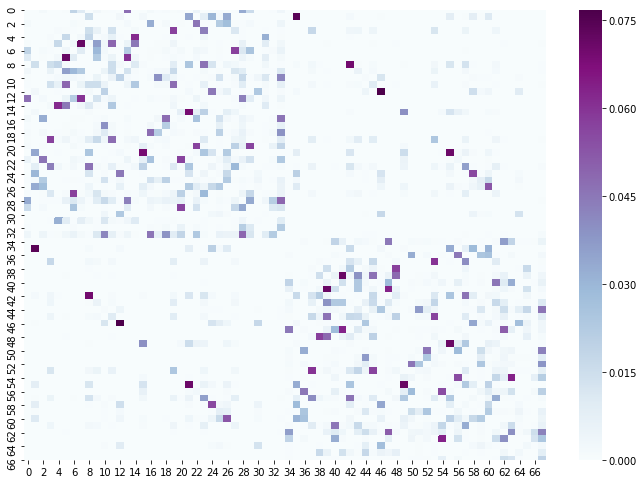

In [9]:
#heatmap connectivity matrix
plot_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=plot_dims)
sns.heatmap(ax = ax, data = M, cmap="BuPu")

In [10]:
#removing weak relationships
#setting treshold 4%
n=4*np.max(M)/100  #compute the 4% of the max value 
MDF=pd.DataFrame(M) 
MT = MDF.where(MDF > n, 0.0)
MT = MT.values #threshold

In [11]:
#a simple model: unweighted graph (binary adjacency matrix)
#let's check only if there is a connection or not
#weighted graph ---> unweighted graph

def weighted_to_binary(L):
    d=L.shape[0]
    for i in range(d):
          for j in range(d):      
            if L[i,j] != 0:
                L[i,j]=1
    return(L)
                
MB=weighted_to_binary(MT)

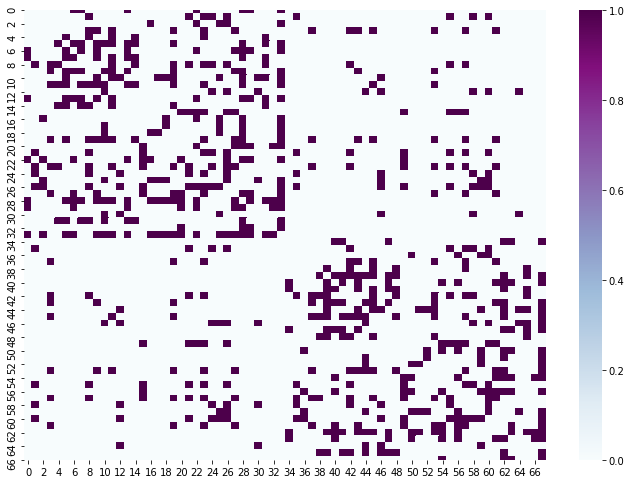

In [12]:
#plot the binary thresolding adjacency matrix
plot_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=plot_dims)
sns.heatmap(ax = ax, data = MB, cmap="BuPu")

## Network construction and graphical illustration

In [13]:
#network construction from adjacency matrix MB
G=nx.convert_matrix.from_numpy_matrix(MB)

In [14]:
#network dimension
print("The network has", len(G), "nodes and", len(G.edges()), "edges")

The network has 68 nodes and 365 edges


C:\Users\arian\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Text(0.5, 1.0, 'coronal plane')

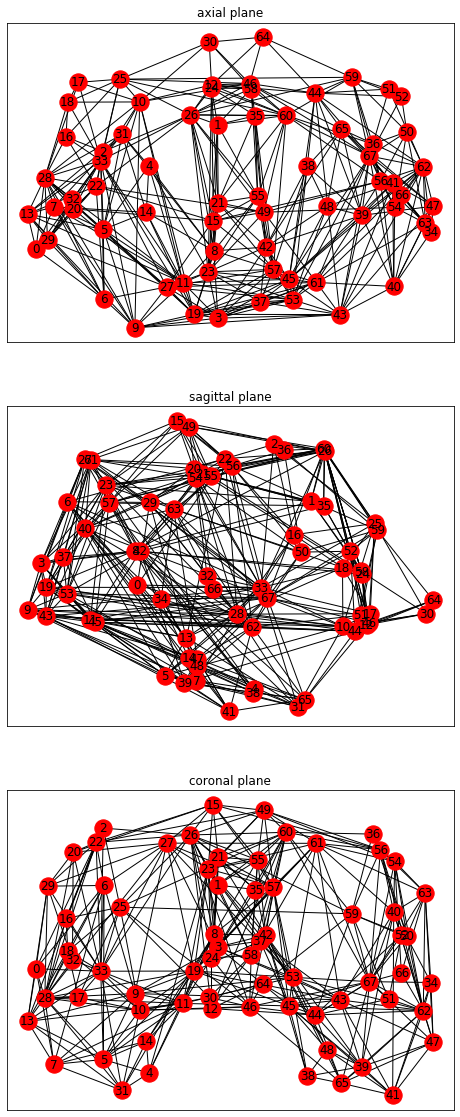

In [15]:
#Network graphic representation: Axial, Sagittal and Coronal planes

fig=plt.figure(figsize=(8,20))
ax = fig.add_subplot(3, 1, 1)
nx.draw_networkx(G,Pxy,node_color='r')
ax1 = fig.add_subplot(3, 1, 2)
nx.draw_networkx(G,Pyz,node_color='r')
ax2 = fig.add_subplot(3, 1, 3)
nx.draw_networkx(G,Pxz,node_color='r')


ax.set_title('axial plane')
ax1.set_title('sagittal plane')
ax2.set_title('coronal plane')

### Null model: compare the results with a random ER network

In [16]:
#We generate a random Erdos-Renyi graph with same average connectivity of G, i.e. same number of nodes and edges.
p=nx.edge_connectivity(G)/len(G.edges())
p

0.010958904109589041

In [17]:
ER=nx.fast_gnp_random_graph(len(G), p)

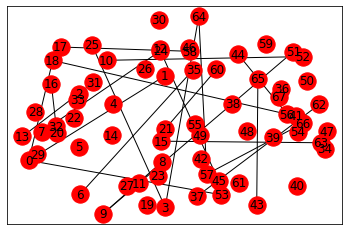

In [18]:
nx.draw_networkx(ER,Pxy,node_color='r')

## Nodes degree, average degree and degree distribution

In [19]:
#Nodes degree: for each node, the degree is computed (dk is a dictionary: for each node, the degree is computed)

dk=dict(G.degree())
g=dk.values()
n=dk.keys()
lg=list(g)
ln=list(n)

deg_df=pd.DataFrame({'node name' : N,
'node degree' :  lg                
})
deg_df.set_index('node name')

,node degree
node name,
lh_bankssts,7
lh_caudalanteriorcingulate,9
lh_caudalmiddlefrontal,5
lh_cuneus,13
lh_entorhinal,6
...,...
rh_supramarginal,10
rh_frontalpole,5
rh_temporalpole,10


In [20]:
#Degree average, max degree, min degree
s=0
for i in range(len(lg)):
    s=s+lg[i]  
    
km=s//len(lg)

print('Degree average:',km,', Max degree:', max(lg),'(', N[max(lg)], ')', ', Min degree:', min(lg), '(', N[min(lg)], ')')


Degree average: 10 , Max degree: 21 ( lh_posteriorcingulate ) , Min degree: 4 ( lh_entorhinal )


C:\Users\arian\anaconda\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


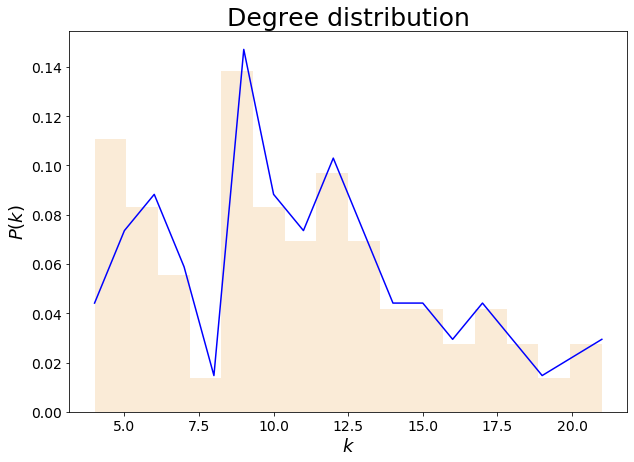

In [21]:
#Degree distribution
#No scale-free, no power law (however hubs exist!!)
#but deviations from a simple gaussian or exponential distribution, characteristic of random networks
#WHY? because of the cost of adding connections in the brain, 
#it seems unlikely that structural brain network can exhibit scale-free degree

from collections import Counter 

deg=dict(G.degree()).values()
deg_distri=Counter(deg)


x=[]
y=[]
for i in sorted(deg_distri):   
    x.append(i)
    y.append(deg_distri[i]/len(G))

plt.figure(figsize=(10,7))  
plt.plot(x,y,color='blue')

plt.hist(deg, normed = True, bins=16, color='antiquewhite')

plt.xlabel('$k$', fontsize=18)
plt.ylabel('$P(k)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Degree distribution', fontsize=25)
plt.show()

C:\Users\arian\anaconda\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


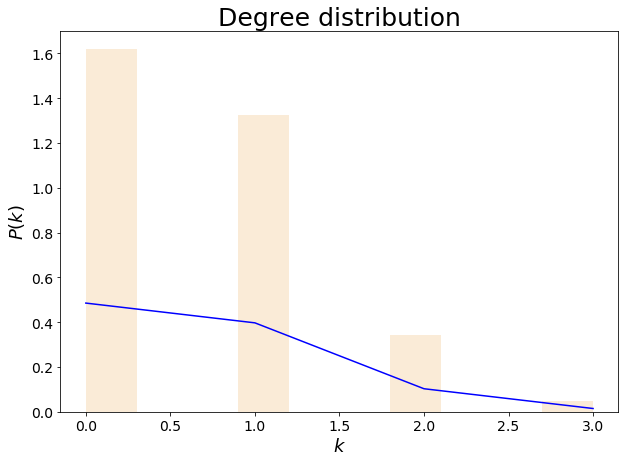

In [22]:
#Degree distribution ER: we expect power law distribution

from collections import Counter 

deg1=dict(ER.degree()).values()
deg_distri1=Counter(deg1)


x=[]
y=[]
for i in sorted(deg_distri1):   
    x.append(i)
    y.append(deg_distri1[i]/len(ER))

plt.figure(figsize=(10,7))  
plt.plot(x,y, color='blue')

plt.hist(deg1, normed = True, bins=10, color='antiquewhite')

plt.xlabel('$k$', fontsize=18)
plt.ylabel('$P(k)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.title('Degree distribution', fontsize=25)
plt.show()

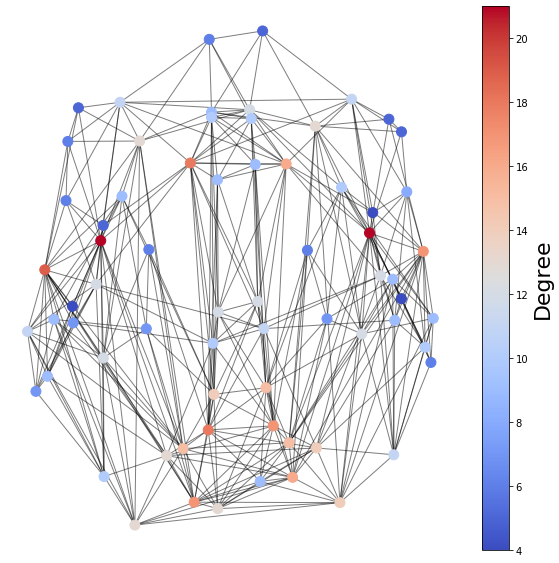

In [23]:
#Plotting network with colormap based on degree: Axial plane
plt.figure(figsize=(10, 10))


s=nx.draw_networkx_nodes(G,
            Pxy,
            node_size=100.0,
            node_color=list(dict(nx.degree(G)).values()),
            alpha=1,
            cmap=plt.cm.coolwarm
            )

nx.draw_networkx_edges(G, Pxy, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)


plt.axis('off')
plt.show()

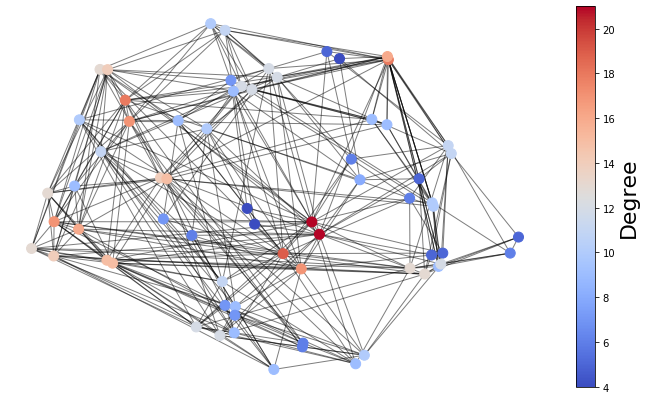

In [24]:
# Plotting network with colormap based on degree: sagittal plane
plt.figure(figsize=(12, 7))


s=nx.draw_networkx_nodes(G,
            Pyz,
            node_size=100.0,
            node_color=list(dict(nx.degree(G)).values()),
            alpha=1,
            cmap=plt.cm.coolwarm
            )

nx.draw_networkx_edges(G, Pyz, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)


plt.axis('off')
plt.show()

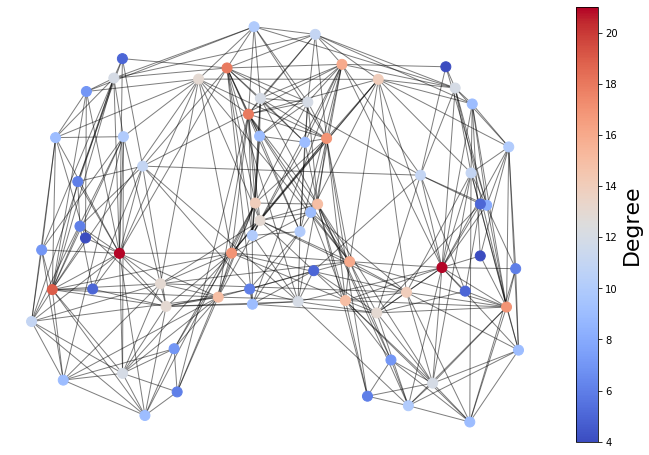

In [25]:
# Plotting network with colormap based on degree: coronal plane
plt.figure(figsize=(12, 8))


s=nx.draw_networkx_nodes(G,
            Pxz,
            node_size=100.0,
            node_color=list(dict(nx.degree(G)).values()),
            alpha=1,
            cmap=plt.cm.coolwarm
            )

nx.draw_networkx_edges(G, Pxz, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)

plt.axis('off')
plt.show()

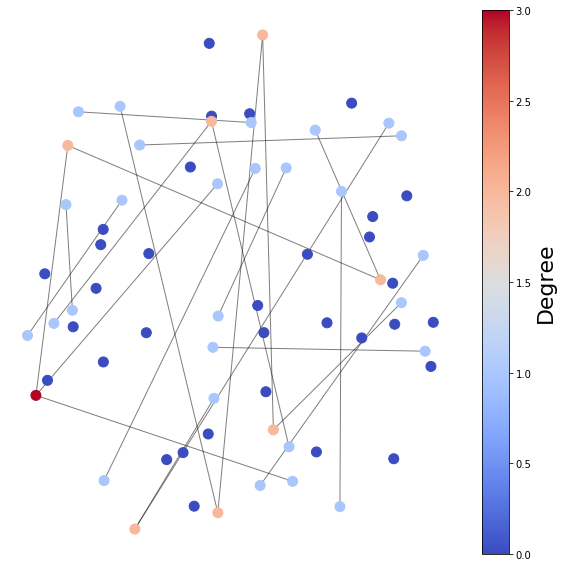

In [26]:
#compare the results: ER
plt.figure(figsize=(10, 10))


s=nx.draw_networkx_nodes(ER,
            Pxy,
            node_size=100.0,
            node_color=list(dict(nx.degree(ER)).values()),
            alpha=1,
            cmap=plt.cm.coolwarm
            )

nx.draw_networkx_edges(ER, Pxy, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)


plt.axis('off')
plt.show()

## Network topological features:

### Connectedness

In [27]:
nx.number_connected_components(G)

1

In [28]:
nx.number_connected_components(ER)

46

### Distance Measures

In [29]:
#Average distance (Average path length) ----> small world!!

nx.average_shortest_path_length(G)

2.357769973661106

In [30]:
#Diameter
nx.diameter(G, e=None)

5

### Clustering

In [31]:
#Local clustering coefficient for each node: in general high clustering ---> communities!!
clc=nx.clustering(G, nodes=None, weight=None)
clc_er=nx.clustering(ER, nodes=None, weight=None)

cl_df=pd.DataFrame({'node name' : N,
'clustering coefficient G' :  list(clc.values()),
'clustering coefficient ER' :  list(clc_er.values()) 
})
cl_df.set_index('node name')

,clustering coefficient G,clustering coefficient ER
node name,,
lh_bankssts,0.857143,0
lh_caudalanteriorcingulate,0.777778,0
lh_caudalmiddlefrontal,0.800000,0
lh_cuneus,0.615385,0
lh_entorhinal,0.666667,0
...,...,...
rh_supramarginal,0.622222,0
rh_frontalpole,0.600000,0
rh_temporalpole,0.466667,0


In [34]:
#Average clustering coefficient
nx.average_clustering(G), nx.average_clustering(ER)

(0.5821914013716508, 0.0)

### Centrality

In [36]:
#Degree centrality and average degree centrality 
#High degree centrality

degree_centr=nx.degree_centrality(G)
degree_centr_er=nx.degree_centrality(ER)

av_degree_centr=st.mean(list(degree_centr.values()))
av_degree_centr_er=st.mean(list(degree_centr_er.values()))


print('average degree centrality G:',av_degree_centr, ', average degree centrality ER:', av_degree_centr_er)

dg_df=pd.DataFrame({'node name' : N,
'degree centrality G' :  list(degree_centr.values()),
'degree centrality ER' :  list(degree_centr_er.values()) 
})
dg_df.set_index('node name')

average degree centrality G: 0.16022827041264268 , average degree centrality ER: 0.009657594381035996


,degree centrality G,degree centrality ER
node name,,
lh_bankssts,0.104478,0.044776
lh_caudalanteriorcingulate,0.134328,0.014925
lh_caudalmiddlefrontal,0.074627,0.000000
lh_cuneus,0.194030,0.029851
lh_entorhinal,0.089552,0.000000
...,...,...
rh_supramarginal,0.149254,0.014925
rh_frontalpole,0.074627,0.029851
rh_temporalpole,0.149254,0.014925


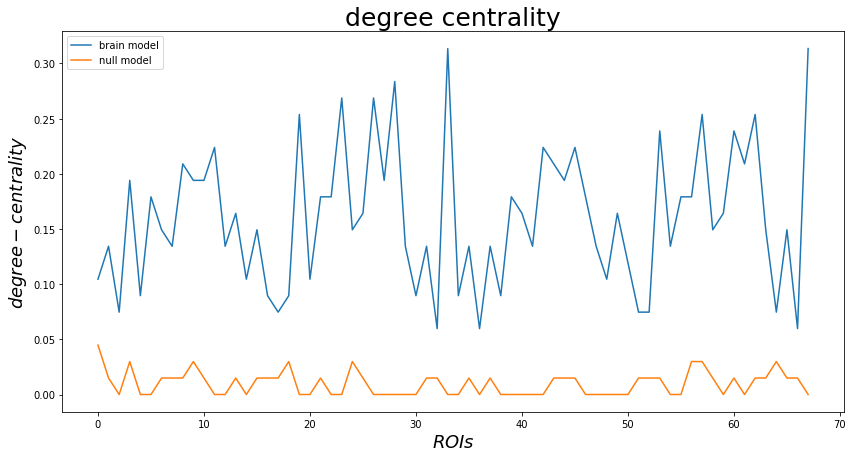

In [48]:
plt.figure(figsize=(14,7)) 
plt.plot(dg_df['degree centrality G'])
plt.plot(dg_df['degree centrality ER'])
plt.title('degree centrality', fontsize=25)
plt.xlabel('$ROIs$', fontsize=18)
plt.ylabel('$degree-centrality$', fontsize=18)
plt.legend(['brain model','null model'])
plt.show()

In [49]:
#Clossness centrality and average clossness centrality 
#high clossness centrality

close_centr=nx.closeness_centrality(G)
close_centr_er=nx.closeness_centrality(ER)
av_close_centr=st.mean(list(close_centr.values()))
av_close_centr_er=st.mean(list(close_centr_er.values()))

print('average clossness centrality G:', av_close_centr, ', average clossness centrality ER:', av_close_centr_er)

cl_df=pd.DataFrame({'node name' : N,
'clossness centrality G' :  list(close_centr.values()),
'clossness centrality ER' :  list(close_centr_er.values()) 
})
cl_df.set_index('node name')

average clossness centrality G: 0.4298303345600268 , average clossness centrality ER: 0.01151751745474309


,clossness centrality G,clossness centrality ER
node name,,
lh_bankssts,0.354497,0.046642
lh_caudalanteriorcingulate,0.421384,0.031095
lh_caudalmiddlefrontal,0.394118,0.000000
lh_cuneus,0.478571,0.034115
lh_entorhinal,0.385057,0.000000
...,...,...
rh_supramarginal,0.396450,0.014925
rh_frontalpole,0.368132,0.039801
rh_temporalpole,0.426752,0.014925


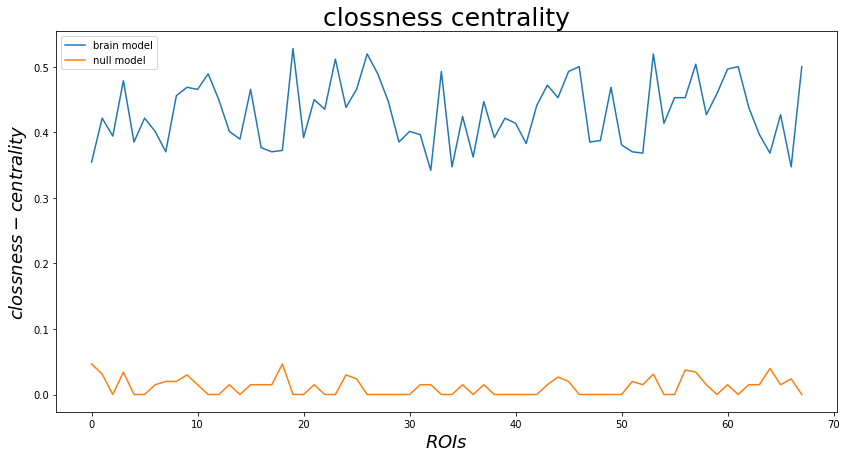

In [50]:
plt.figure(figsize=(14,7)) 
plt.plot(cl_df['clossness centrality G'])
plt.plot(cl_df['clossness centrality ER'])
plt.title('clossness centrality', fontsize=25)
plt.xlabel('$ROIs$', fontsize=18)
plt.ylabel('$clossness-centrality$', fontsize=18)
plt.legend(['brain model','null model'])
plt.show()

In [52]:
#Betweenness centrality and average betweeness centrality
#high betweeness centrality
betw_centr=nx.betweenness_centrality(G, normalized=True)
betw_centr_er=nx.betweenness_centrality(ER, normalized=True)
av_betw_centr=st.mean(list(betw_centr.values()))
av_betw_centr_er=st.mean(list(betw_centr_er.values()))


print('average betweenness centrality G:', av_betw_centr, ', average betweenness centrality ER:', av_betw_centr_er)

bc_df=pd.DataFrame({'node name' : N,
'betweenness centrality G' :  list(betw_centr.values()),
'betweenness centrality ER' :  list(betw_centr_er.values()) 
})
bc_df.set_index('node name')

average betweenness centrality G: 0.02057227232819858 , average betweenness centrality ER: 0.00019288583818873547


,betweenness centrality G,betweenness centrality ER
node name,,
lh_bankssts,0.000784,0.003166
lh_caudalanteriorcingulate,0.001904,0.000000
lh_caudalmiddlefrontal,0.000885,0.000000
lh_cuneus,0.009679,0.001357
lh_entorhinal,0.001591,0.000000
...,...,...
rh_supramarginal,0.005328,0.000000
rh_frontalpole,0.001561,0.001809
rh_temporalpole,0.016855,0.000000


In [53]:
#high betweenness centrality for a small set of brain regions:

bc_df.sort_values(['betweenness centrality G'],ascending=False).head()

,node name,betweenness centrality G,betweenness centrality ER
67,rh_insula,0.092431,0.0
33,lh_insula,0.083305,0.0
26,lh_superiorfrontal,0.081516,0.0
19,lh_pericalcarine,0.063143,0.0
60,rh_superiorfrontal,0.056915,0.0


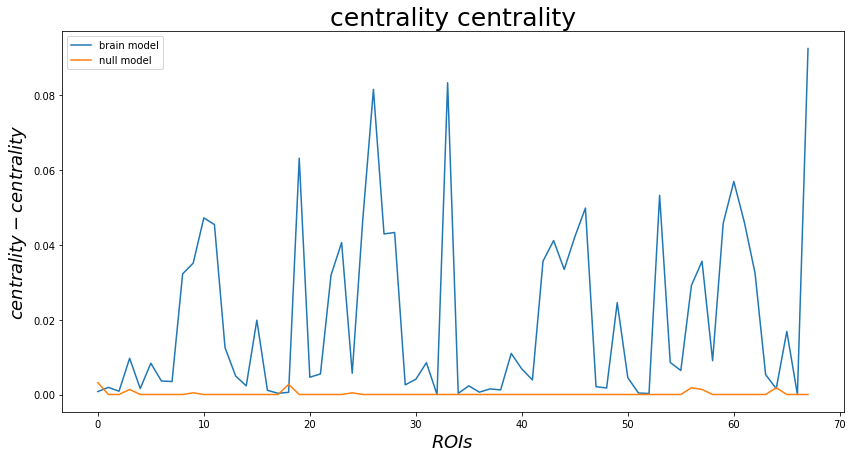

In [56]:
plt.figure(figsize=(14,7)) 
plt.plot(bc_df['betweenness centrality G'])
plt.plot(bc_df['betweenness centrality ER'])
plt.title('centrality centrality', fontsize=25)
plt.xlabel('$ROIs$', fontsize=18)
plt.ylabel('$centrality-centrality$', fontsize=18)
plt.legend(['brain model','null model'])
plt.show()

In [58]:
#measures summary 
print('summary - structural brain network measures:')
m_df=pd.DataFrame({'node name' : N,
'clustering coefficient' :  list(clc.values()),
'degree centrality' :  list(degree_centr.values()),                 
'clossness centrality' :  list(close_centr.values()),                  
'betweeness centrality' :  list(betw_centr.values())
})
m_df.set_index('node name')

summary - structural brain network measures:


,clustering coefficient,degree centrality,clossness centrality,betweeness centrality
node name,,,,
lh_bankssts,0.857143,0.104478,0.354497,0.000784
lh_caudalanteriorcingulate,0.777778,0.134328,0.421384,0.001904
lh_caudalmiddlefrontal,0.800000,0.074627,0.394118,0.000885
lh_cuneus,0.615385,0.194030,0.478571,0.009679
lh_entorhinal,0.666667,0.089552,0.385057,0.001591
...,...,...,...,...
rh_supramarginal,0.622222,0.149254,0.396450,0.005328
rh_frontalpole,0.600000,0.074627,0.368132,0.001561
rh_temporalpole,0.466667,0.149254,0.426752,0.016855


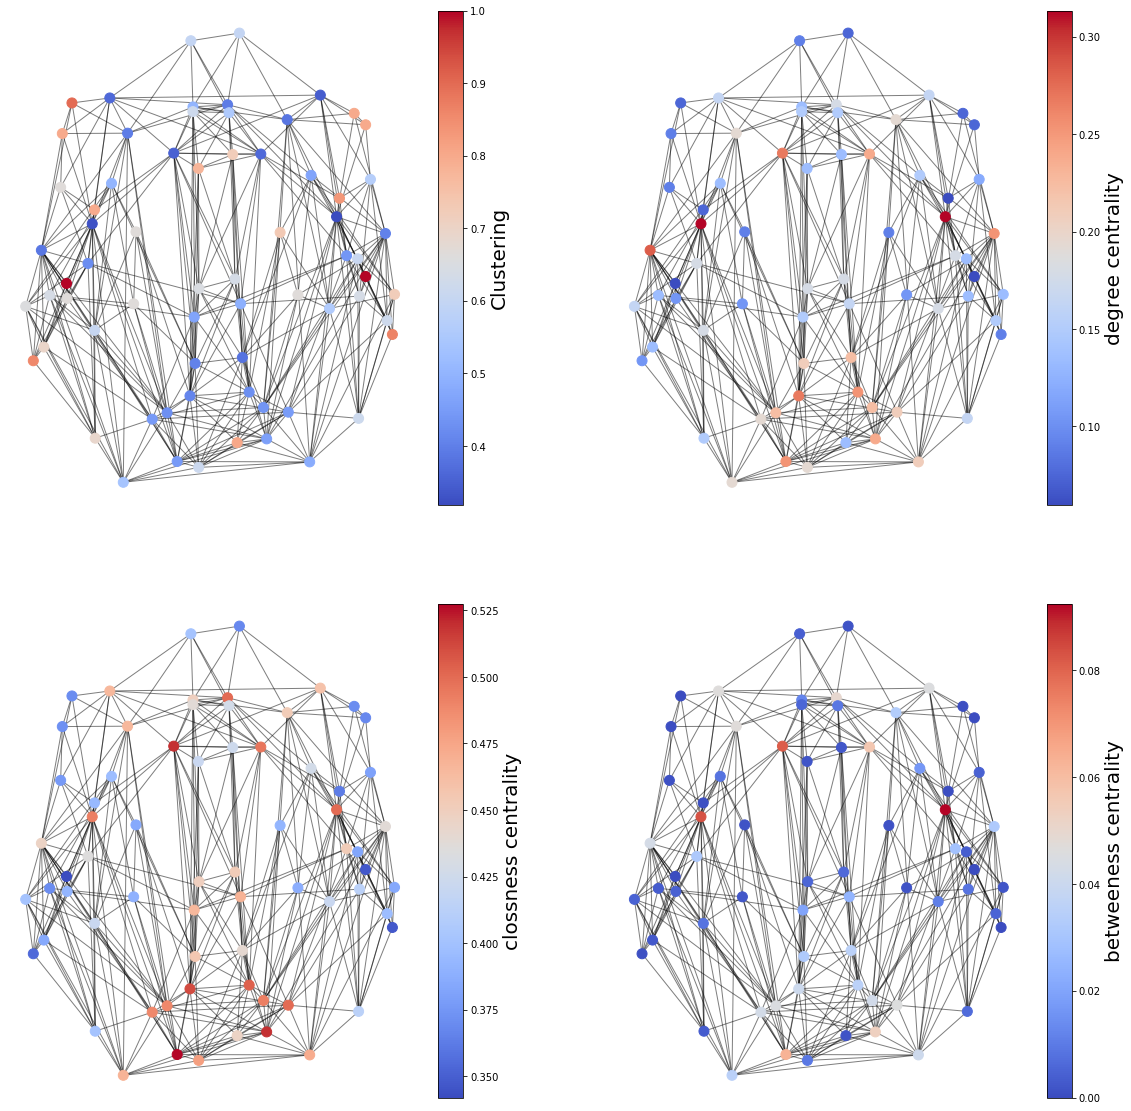

In [96]:
#graphical results
plt.figure(figsize=(20,20))

#clustering


plt.subplot(221)
s=nx.draw_networkx_nodes(G,
            Pxy,
            node_size=100.0,
            node_color=list(clc.values()),
            alpha=1,
            cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(G, Pxy, alpha=0.5)
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Clustering', size=20)
plt.axis('off')


#degree centrality

plt.subplot(222)
s=nx.draw_networkx_nodes(G,
            Pxy,
            node_size=100.0,
            node_color=list(degree_centr.values()),
            alpha=1,
            cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(G, Pxy, alpha=0.5)
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('degree centrality', size=20)
plt.axis('off')



#clossness centrality

plt.subplot(223)
s=nx.draw_networkx_nodes(G,
            Pxy,
            node_size=100.0,
            node_color=list(close_centr.values()),
            alpha=1,
            cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(G, Pxy, alpha=0.5)
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('clossness centrality', size=20)
plt.axis('off')



#betweeness centrality

plt.subplot(224)
s=nx.draw_networkx_nodes(G,
            Pxy,
            node_size=100.0,
            node_color=list(betw_centr.values()),
            alpha=1,
            cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(G, Pxy, alpha=0.5)
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('betweeness centrality', size=20)
plt.axis('off')

plt.show()

> ***High clustering, short path lengths and high centrality (with respect to the null model ER) reveal a robust small world architecture!***

## Communities and degree assortativity


In [69]:
#Girvan-Newmann algorithm, based on link betweeness centrality: 3 communities
import networkx as nx
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
cm=sorted(map(sorted, next_level_communities))
len(cm), cm

(3,
 [[0,
   2,
   4,
   5,
   6,
   7,
   9,
   10,
   11,
   13,
   14,
   16,
   17,
   18,
   19,
   20,
   22,
   25,
   27,
   28,
   29,
   31,
   32,
   33],
  [1, 3, 8, 12, 15, 21, 23, 24, 26, 30, 35, 42, 46, 49, 55, 57, 58, 60, 64],
  [34,
   36,
   37,
   38,
   39,
   40,
   41,
   43,
   44,
   45,
   47,
   48,
   50,
   51,
   52,
   53,
   54,
   56,
   59,
   61,
   62,
   63,
   65,
   66,
   67]])

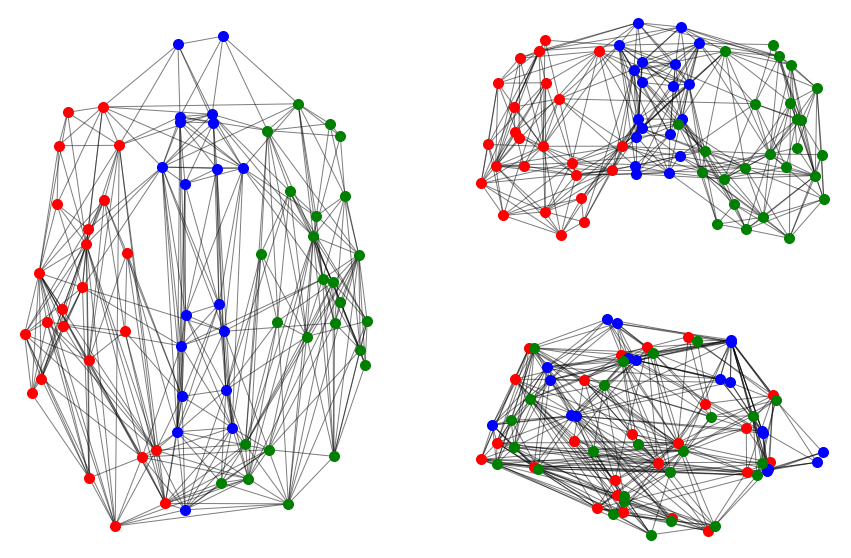

In [116]:
#Plotting network with colormap based on degree: Axial plane
plt.figure(figsize=(15,10))

plt.subplot(121)
nx.draw_networkx_nodes(G, Pxy, cm[0], node_color="r",node_size=100.0)
nx.draw_networkx_nodes(G, Pxy, cm[1], node_color="b",node_size=100.0)
nx.draw_networkx_nodes(G, Pxy, cm[2], node_color="g",node_size=100.0)
nx.draw_networkx_edges(G, Pxy, alpha=0.5)
plt.axis('off')

plt.subplot(222)
nx.draw_networkx_nodes(G, Pxz, cm[0], node_color="r",node_size=100.0)
nx.draw_networkx_nodes(G, Pxz, cm[1], node_color="b",node_size=100.0)
nx.draw_networkx_nodes(G, Pxz, cm[2], node_color="g",node_size=100.0)
nx.draw_networkx_edges(G, Pxz, alpha=0.5)
plt.axis('off')

plt.subplot(224)
nx.draw_networkx_nodes(G, Pyz, cm[0], node_color="r",node_size=100.0)
nx.draw_networkx_nodes(G, Pyz, cm[1], node_color="b",node_size=100.0)
nx.draw_networkx_nodes(G, Pyz, cm[2], node_color="g",node_size=100.0)
nx.draw_networkx_edges(G, Pyz, alpha=0.5)
plt.axis('off')


plt.show()

In [117]:
#Degree assortativity coefficient
#Degree assortativity? The coefficient is negative: disassortative mixing - favor of connections between dissimilar nodes
nx.degree_assortativity_coefficient(G)

-0.037323390976520876